$\textbf{Empirical Exercise-Week 10}$  International evidence on productivity and growth. File: ces.sv. Text: p. 673, 15. 23

In [29]:
clear all;
Tab1 = readtable('ces.csv');
Tab1.Properties.VariableNames
Tab1(1,:);



ans =

  1x44 cell array

  Columns 1 through 15

    {'code'}    {'year'}    {'y'}    {'k'}    {'l'}    {'e'}    {'ly'}    {'lk'}    {'ll'}    {'variabl0'}    {'hl'}    {'lhl'}    {'t'}    {'lyl'}    {'lkl'}

  Columns 16 through 30

    {'lkl2'}    {'d1'}    {'d2'}    {'d3'}    {'d4'}    {'d5'}    {'d6'}    {'d7'}    {'d8'}    {'d9'}    {'d10'}    {'d11'}    {'d12'}    {'d13'}    {'d14'}

  Columns 31 through 44

    {'d15'}    {'d16'}    {'d17'}    {'d18'}    {'d19'}    {'d20'}    {'d21'}    {'d22'}    {'d23'}    {'d24'}    {'d25'}    {'d26'}    {'d27'}    {'d28'}




In [32]:
ly = table2array(Tab1(:,7)); lk = table2array(Tab1(:,8)); ll = table2array(Tab1(:,9));
Dummy = Tab1(:,18:end);
Dummy = table2array(Dummy);
size(Dummy)


ans =

        2296          28




In [14]:
trend1 =  [1:28]';
length(trend1);
trend  = kron(ones(82,1),trend1);



xx = [ones(2296,1) lk ll]; yy = ly;
[B BINT R R1 STATS] = regress(yy,xx);
[B BINT]




ans =

    28


ans =

        2296


ans =

    0.3787    0.1860    0.5714
    0.8624    0.8528    0.8719
    0.1373    0.1239    0.1507




We see the production coefficients, with .86 on capital, .13 on labor
Do these addup to unity? Use the tstat

In [4]:
SIGMAB = inv(xx'*xx)* sum(R.^2)/(length(xx)-3);
Tstat1 = B(2) + B(3) - 1;
Tstat2 = SIGMAB(2,2)+ SIGMAB(3,3) + 2 * SIGMAB(2,3);
Tstat3 = sqrt(Tstat2);
TSTAT = Tstat1/Tstat3;
dgf = length(xx)-3;
Tprob = tcdf(TSTAT,dgf);
1 - Tprob


ans =

    0.5259




We cannot reject the null hypothesis that the coefficients add up to unity.

In [5]:
xxx = [ones(2296,1) lk ll trend]; yy = ly;
[B1 BINT1 R1 RINR1 STATS1] = regress(yy,xxx);
[B1 BINT1]


ans =

    0.2995    0.1128    0.4861
    0.8743    0.8649    0.8837
    0.1351    0.1221    0.1480
   -0.0121   -0.0140   -0.0103




Trend term does not have much effect on coefficients of labor and capital

In [6]:
who


Your variables are:

B       BINT    R       RINR1   STATS   TSTAT   Tprob   Tstat2  ans     lk      ly      trend1  xxx     
B1      BINT1   R1      SIGMAB  STATS1  Tab1    Tstat1  Tstat3  dgf     ll      trend   xx      yy      




In [7]:
lyl = ly - ll;
lkl = lk - ll;
xxx = [ones(2296,1) lkl  trend]; yyy = lyl;
[B2 BINT2 R2 RINT2 STATS2] = regress(yyy,xxx);
[B2 BINT2]


ans =

    0.4530    0.3716    0.5344
    0.8731    0.8638    0.8825
   -0.0119   -0.0137   -0.0100




Coefficient of capital/labor ratio not much different from capital coefficient

Lets do an F statistic for individual country dummies. Do they matter?

In [65]:
trend = 1:28;
trend1 = trend';
trend2 = kron(ones(82,1),trend1);

xx = [ones(82*28,1) trend2 lk ll]; yy = ly;
Dummy1 = kron(eye(82),trend1);

xxx = [Dummy1(:,2:end) xx];


[Bfixed, BINTfixed Rfixed RINTfixed] = regress(yy,xxx);

SSE = sum(Rfixed.^2);
[nrows ncols] = size(xxx);
DGF = nrows - ncols; 
Fdenom = SSE/DGF;
J = 81;
[Bfixed1, BINTfixed1, Rfixed1] = regress(yy,xx);
SSE1 = sum(Rfixed1.^2);
Fnum = (SSE1 - SSE)/J;
Fstat = Fnum/Fdenom;
Fstat
Fprob = 1 - fcdf(Fstat,J,DGF);
Fprob

[Bfixed BINTfixed]



Fstat =

   33.7535


Fprob =

     0


ans =

   -0.0010   -0.0091    0.0072
   -0.0005   -0.0082    0.0072
   -0.0003   -0.0080    0.0074
    0.0037   -0.0044    0.0118
   -0.0062   -0.0141    0.0017
   -0.0083   -0.0160   -0.0006
   -0.0162   -0.0239   -0.0085
   -0.0079   -0.0156   -0.0002
    0.0043   -0.0034    0.0121
   -0.0012   -0.0090    0.0067
   -0.0115   -0.0192   -0.0038
   -0.0107   -0.0185   -0.0030
   -0.0016   -0.0094    0.0063
   -0.0060   -0.0137    0.0017
   -0.0023   -0.0100    0.0054
   -0.0081   -0.0160   -0.0003
   -0.0002   -0.0082    0.0078
    0.0150    0.0072    0.0228
   -0.0033   -0.0111    0.0044
   -0.0068   -0.0145    0.0010
   -0.0222   -0.0300   -0.0144
   -0.0065   -0.0144    0.0013
   -0.0170   -0.0248   -0.0092
    0.0067   -0.0012    0.0146
   -0.0277   -0.0355   -0.0199
   -0.0242   -0.0320   -0.0163
   -0.0074   -0.0152    0.0005
   -0.0209   -0.0289   -0.0129
   -0.0129   -0.0207   -0.0052
   -0.0489   -0.0568   -0.0410
   -0.0076   -0.0156  

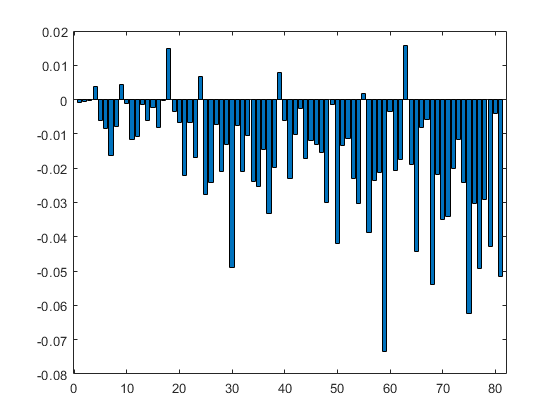

In [66]:
bar(Bfixed(1:end-4))

Lets see of the country specific dummies matter. 

In [67]:
Dummy2 = table2array(Tab1(:,18:end));

In [68]:
xxxx = [Dummy2 ones(2296,1) lk ll ]; yy = ly;
[Bfixed2 BINTfixed2 Rfixed2] = regress(yy,xxx);


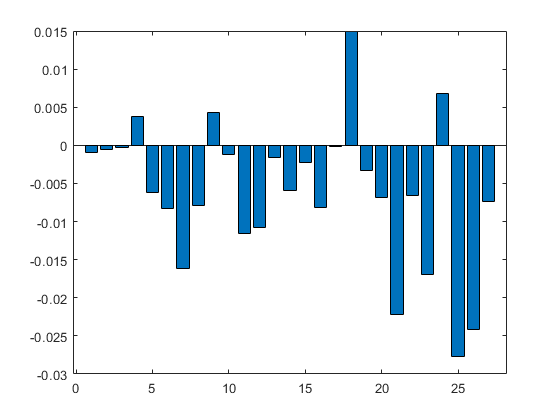

In [69]:
bar(Bfixed2(1:27))


We can reject that null hypothesis that the individual country effects do not matter.
